<a href="https://colab.research.google.com/github/hadijahumaira/python_for_datascience/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link dataset : https://drive.google.com/file/d/1l05mWtuFURx7UEyJPxzLLPAle9U3ExAr/view?usp=sharing

# Exploratory Data Analysis

## Import Library

In [43]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlb
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

## Data Understanding

In [44]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [45]:
# Melihat 5 data teratas
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [46]:
# Melihat jumlah baris dan kolom data
df.shape

(5110, 12)

In [47]:
#Pengecekan data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [48]:
# Melihat deskripsi dataset
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [49]:
df.mean(numeric_only=True)

,0
id,36517.829354
age,43.226614
hypertension,0.097456
heart_disease,0.054012
avg_glucose_level,106.147677
bmi,28.893237
stroke,0.048728


In [50]:
df.median(numeric_only=True)

,0
id,36932.000
age,45.000
hypertension,0.000
heart_disease,0.000
avg_glucose_level,91.885
bmi,28.100
stroke,0.000


## EDA

In [51]:
#missing value check
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [52]:
df = df.dropna()

In [53]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [54]:
# check duplicate
df1 = df.apply(lambda x:sum(x.duplicated()))
print(df1)

id                      0
gender               4906
age                  4805
hypertension         4907
heart_disease        4907
ever_married         4907
work_type            4904
Residence_type       4907
avg_glucose_level    1057
bmi                  4491
smoking_status       4905
stroke               4907
dtype: int64


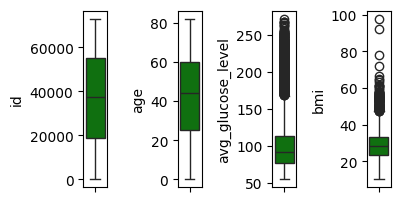

In [55]:
# outliers checking
nums = [i for i in df.columns if df[i].dtypes != 'object' and i not in  ['stroke', 'hypertension', 'heart_disease']]
plt.figure(figsize=(6,6))
for i in range(0, len(nums)):
    plt.subplot(3, 6, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

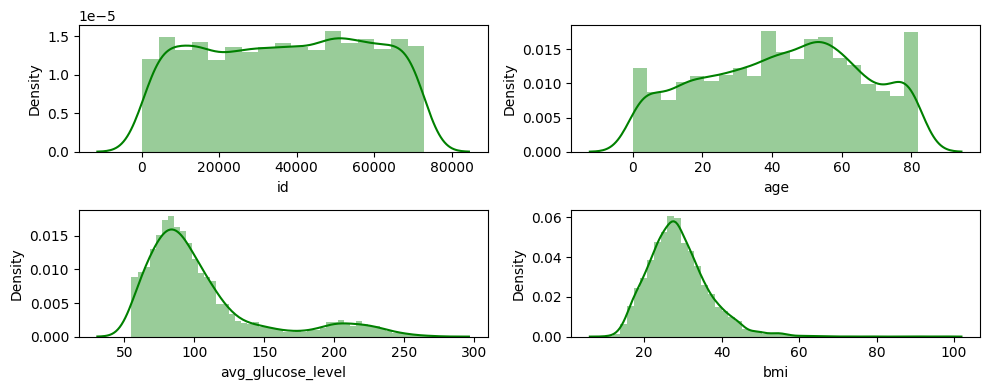

In [56]:
# distribusi data
plt.figure(figsize=(10, 4))
for i in range(0, len(nums)):
    plt.subplot(2, 2, i+1)
    sns.distplot(df[nums[i]], color='green')
    plt.tight_layout()

<Axes: >

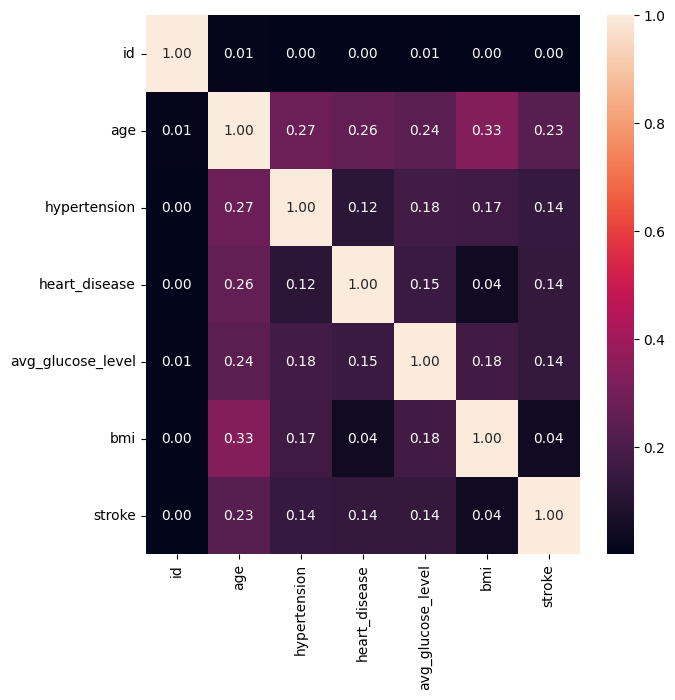

In [57]:
# Correlation
plt.figure(figsize=(7, 7))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='.2f')